In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
h = fits.open('Structure_R_Fit 7')

In [3]:
h.info()

Filename: Structure_R_Fit 7
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (11290,)   uint8   
  1  Joined        1 BinTableHDU    315   13743R x 131C   [K, D, D, K, 2A, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, J, J, J, I, I, D, D, K, 15A, D, D, J, E, J, J, J, E, J, E, E, E, E, E, E, E, E, E, J, J, J, J, E, J, E, E, E, E, E, E, E, E, E, J, J, J, J, E, J, E, E, E, E, E, E, E, E, E, J, J, J, J, J, E, E, E, E, E, E, J, E, E, E, E, E, E, J, E, E, E, E, E, E, J, J, J, J, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, D, D]   


In [4]:
H = h[1].data

In [5]:
c = 300000
H_0 = 70

Sersic_R = np.array(H.field(49))
Radius = np.array(H.field(114))
MagI = np.array(H.field(11))
MagR = np.array(H.field(9))
Z = np.array(H.field(21))

Conc = np.array(H.field(102))
Asym = np.array(H.field(104))
Clump = np.array(H.field(105))

print(Z)

[0.20976074 0.23220406 0.22082122 ... 0.77934408 0.78675056 0.75534606]


In [6]:
Dis = (Z*c/H_0)*10**6

MI = MagI + 5 - 5*np.log10(Dis)
MR = MagR + 5 - 5*np.log10(Dis)

Colour = MR - MI

In [7]:
from scipy.stats import gaussian_kde

xy = np.vstack([Radius,Sersic_R])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
Radius2, Sersic_R2, z = Radius[idx], Sersic_R[idx], z[idx]

Text(0, 0.5, 'Sersic Index')

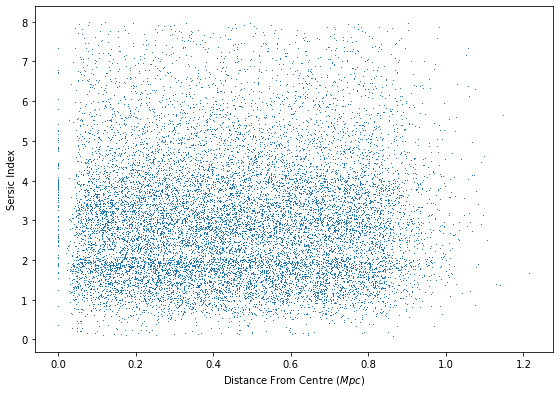

In [7]:
plt.figure(1).add_axes((0,0,1.2,1.2))

plt.scatter(Radius, Sersic_R, s=1, marker="s", linewidth=0)

plt.xlabel("Distance From Centre ($Mpc$)")
plt.ylabel("Sersic Index")

In [9]:
xyx = np.vstack([Colour,Sersic_R])
zx = gaussian_kde(xyx)(xyx)

# Sort the points by density, so that the densest points are plotted last
idxx = zx.argsort()
Colour2, Sersic_R, zx = Colour[idxx], Sersic_R[idxx], zx[idxx]

Text(0, 0.5, 'G - I Colour')

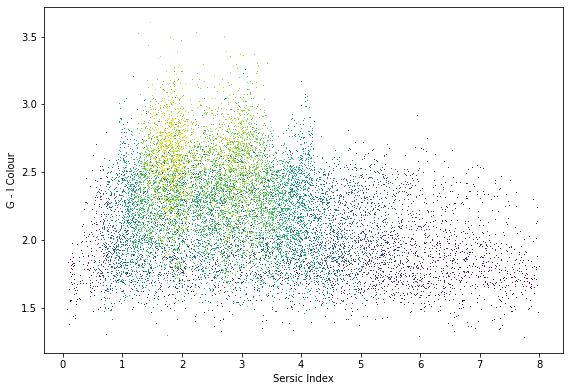

In [11]:
plt.figure(1).add_axes((0,0,1.2,1.2))

plt.scatter(Sersic_R, Colour,c=zx, s=1, marker="s", linewidth=0)

plt.xlabel("Sersic Index")
plt.ylabel("G - I Colour")

Text(0, 0.5, 'Concentration')

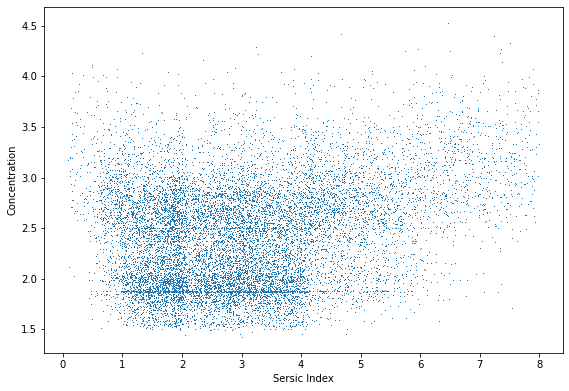

In [23]:
plt.figure(1).add_axes((0,0,1.2,1.2))

plt.scatter(Sersic_R, Conc, s=1, marker="s", linewidth=0)

plt.xlabel("Sersic Index")
plt.ylabel("Concentration")